Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [70]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [71]:
## If you are using the data by mounting the google drive, use the following :
#from google.colab import drive
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [72]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./Train/")
data_dir_test = pathlib.Path('./Test')

In [73]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [74]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [75]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2549 files belonging to 9 classes.
Using 2040 files for training.


In [76]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2549 files belonging to 9 classes.
Using 509 files for validation.


In [77]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

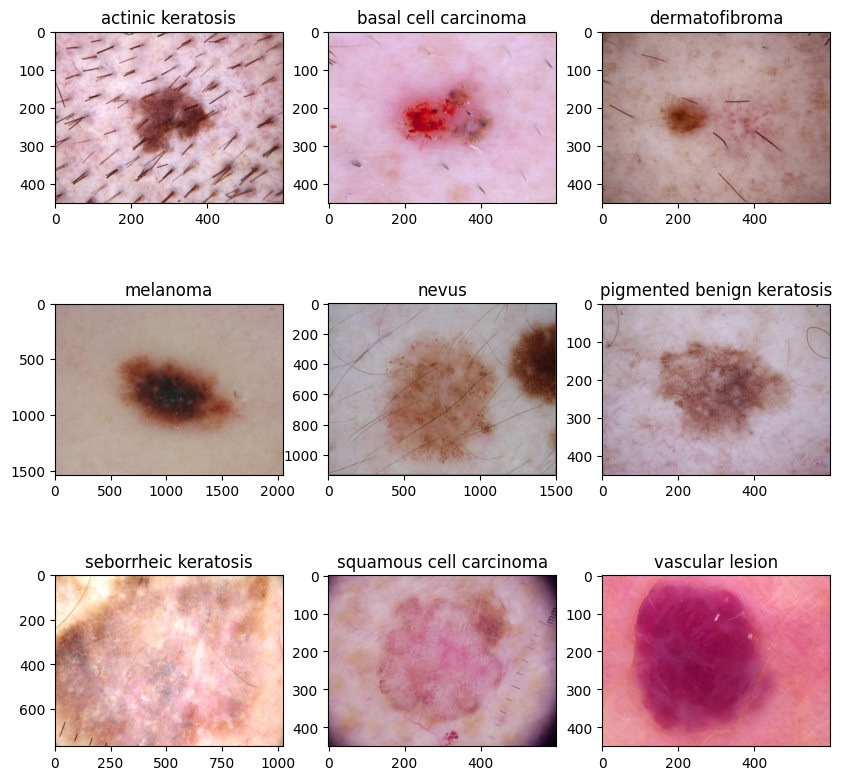

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [79]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [80]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [81]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [82]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

### Train the model

In [83]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


64/64 [==============================] - 33s 230ms/step - loss: 2.0848 - accuracy: 0.1618 - val_loss: 2.0673 - val_accuracy: 0.1611
Epoch 2/30
64/64 [==============================] - 6s 91ms/step - loss: 2.0521 - accuracy: 0.1725 - val_loss: 2.0575 - val_accuracy: 0.1749
Epoch 3/30
64/64 [==============================] - 6s 94ms/step - loss: 2.0064 - accuracy: 0.2123 - val_loss: 1.9933 - val_accuracy: 0.2004
Epoch 4/30
64/64 [==============================] - 6s 92ms/step - loss: 1.9565 - accuracy: 0.2304 - val_loss: 2.0009 - val_accuracy: 0.2083
Epoch 5/30
64/64 [==============================] - 6s 93ms/step - loss: 1.9856 - accuracy: 0.2289 - val_loss: 2.0481 - val_accuracy: 0.2122
Epoch 6/30
64/64 [==============================] - 6s 93ms/step - loss: 1.9899 - accuracy: 0.2245 - val_loss: 2.0680 - val_accuracy: 0.1749
Epoch 7/30
64/64 [==============================] - 6s 92ms/step - loss: 1.9171 - accuracy: 0.2686 - val_loss: 1.8057 - val_accuracy: 0.3045
Epoch 8/30
64/64 [====

### Visualizing training results

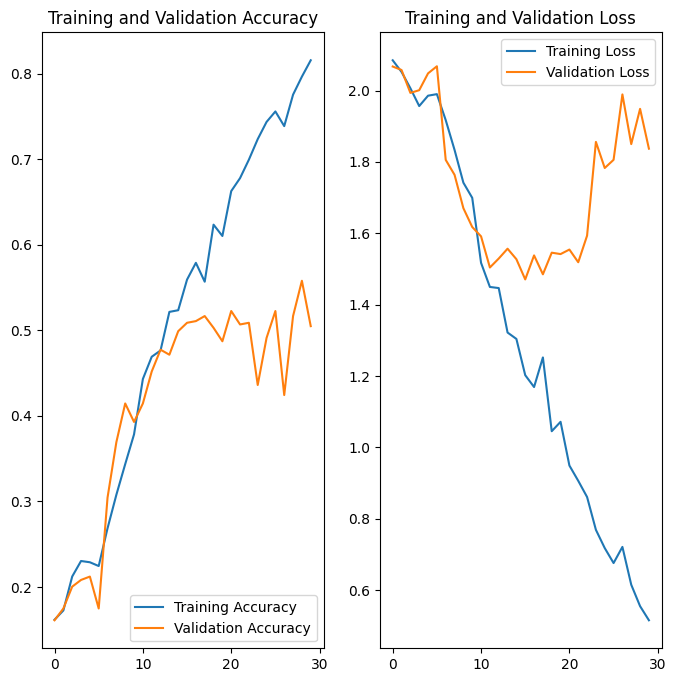

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
- The model is overfitting because we can also see difference in loss functions in training & test after few epochs

### Write your findings here

In [85]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

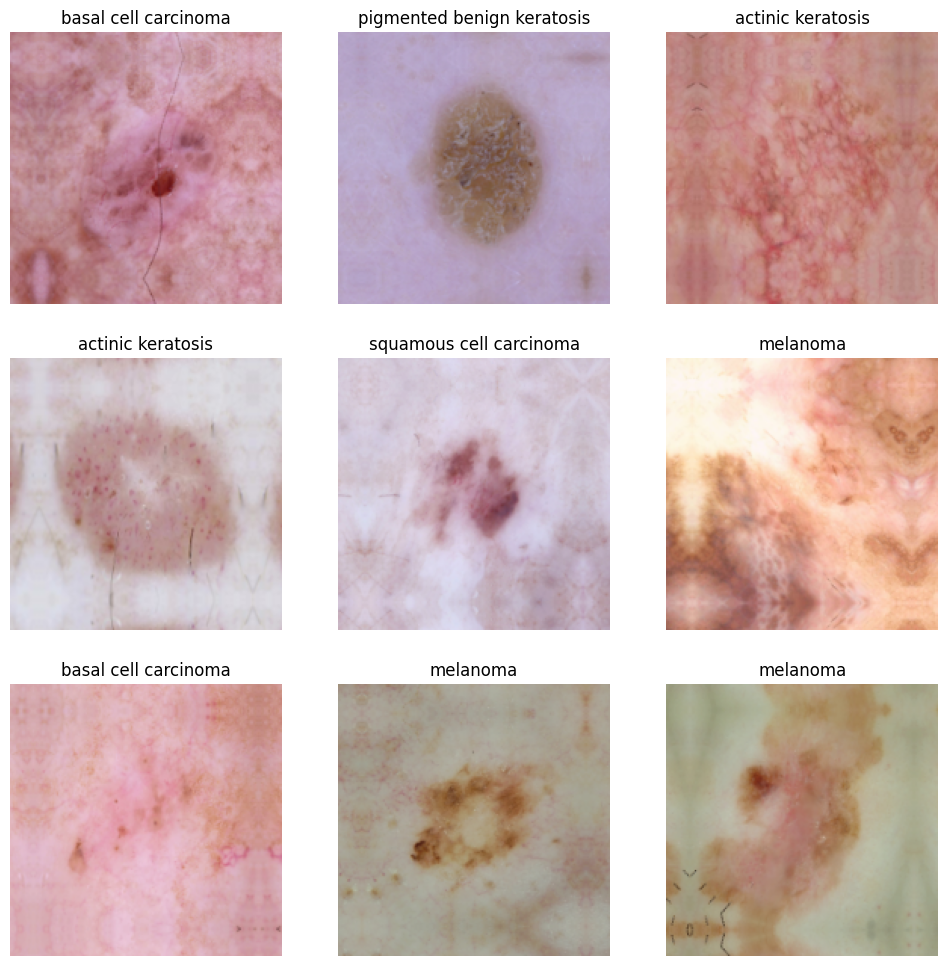

In [86]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [87]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))




### Compiling the model

In [88]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [89]:
## Your code goes here, note: train your model for 20 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
64/64 [==============================] - 10s 135ms/step - loss: 2.0797 - accuracy: 0.1711 - val_loss: 2.0502 - val_accuracy: 0.1729
Epoch 2/30
64/64 [==============================] - 7s 106ms/step - loss: 2.0342 - accuracy: 0.2123 - val_loss: 2.0742 - val_accuracy: 0.1611
Epoch 3/30
64/64 [==============================] - 7s 104ms/step - loss: 2.0501 - accuracy: 0.1642 - val_loss: 2.0423 - val_accuracy: 0.1788
Epoch 4/30
64/64 [==============================] - 7s 105ms/step - loss: 2.0879 - accuracy: 0.1833 - val_loss: 2.0571 - val_accuracy: 0.1768
Epoch 5/30
64/64 [==============================] - 7s 106ms/step - loss: 2.0585 - accuracy: 0.1804 - val_loss: 2.0554 - val_accuracy: 0.1729
Epoch 6/30
64/64 [==============================] - 7s 104ms/step - loss: 2.0520 - accuracy: 0.1730 - val_loss: 2.0477 - val_accuracy: 0.2141
Epoch 7/30
64/64 [==============================] - 7s 105ms/step - loss: 2.0464 - accuracy: 0.1931 - val_loss: 2.0490 - val_accuracy: 0.1670
Epoch

### Visualizing the results

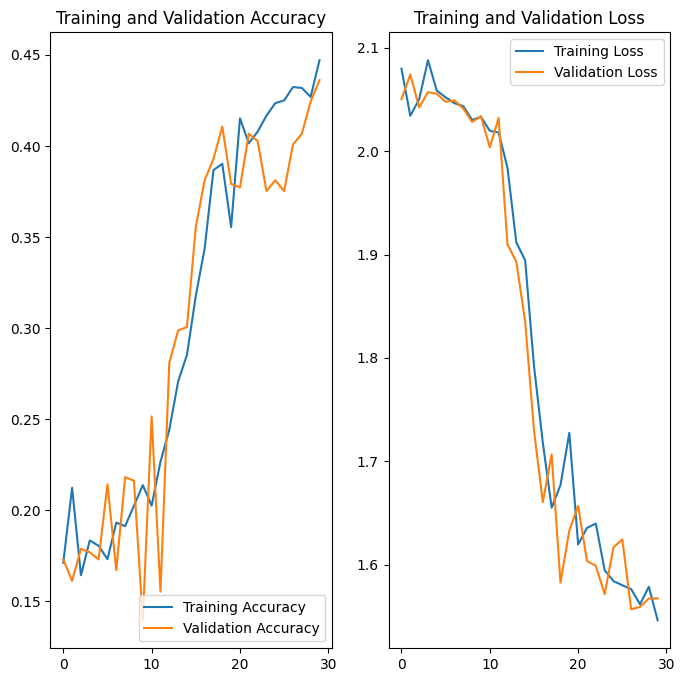

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

1. Accuracy is still low
2. Overfitting has now reduced


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

total training image count = 2239 

-------------------------------------
Class name =  actinic keratosis
count      =  114
proportion =  0.05091558731576597
-------------------------------------
Class name =  basal cell carcinoma
count      =  376
proportion =  0.16793211255024565
-------------------------------------
Class name =  dermatofibroma
count      =  95
proportion =  0.04242965609647164
-------------------------------------
Class name =  melanoma
count      =  438
proportion =  0.19562304600267977
-------------------------------------
Class name =  nevus
count      =  357
proportion =  0.15944618133095131
-------------------------------------
Class name =  pigmented benign keratosis
count      =  462
proportion =  0.20634211701652524
-------------------------------------
Class name =  seborrheic keratosis
count      =  77
proportion =  0.03439035283608754
-------------------------------------
Class name =  squamous cell carcinoma
count      =  181
proportion =  0.08083966056

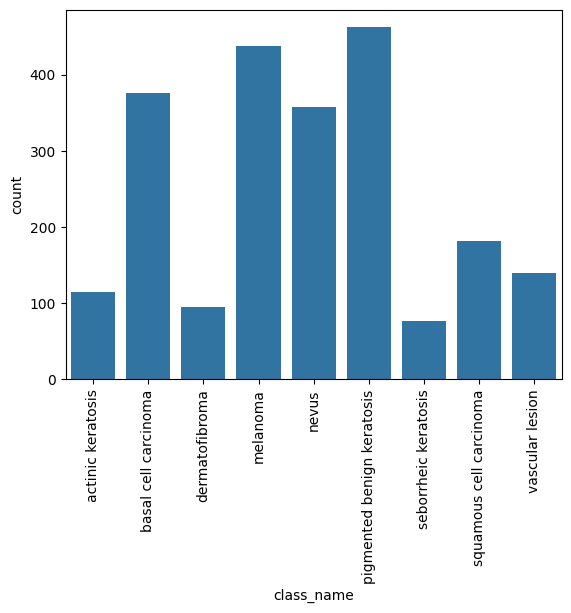

In [91]:
import seaborn as sns
num_classes = len(class_names)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?

1. seaborrheic keratosis least number of samples

2.  Melanoma and pigmented benign keratosis and basal cell carcinoma dominate the samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [92]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [93]:
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [97]:
import Augmentor
for i in class_names:
    source = pathlib.Path("./Train/" + i)
    print(source.resolve())
    p = Augmentor.Pipeline(source, save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

/content/gdrive/My Drive/TrainTestData/Train/actinic keratosis
Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/TrainTestData/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D92948093C0>: 100%|██████████| 1000/1000 [00:37<00:00, 26.37 Samples/s]


/content/gdrive/My Drive/TrainTestData/Train/basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/TrainTestData/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D92914F9D20>: 100%|██████████| 1000/1000 [00:36<00:00, 27.66 Samples/s]


/content/gdrive/My Drive/TrainTestData/Train/dermatofibroma
Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/TrainTestData/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D928FDF1480>: 100%|██████████| 1000/1000 [00:39<00:00, 25.48 Samples/s]


/content/gdrive/My Drive/TrainTestData/Train/melanoma
Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/TrainTestData/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D92949FE5C0>: 100%|██████████| 1000/1000 [03:02<00:00,  5.48 Samples/s]


/content/gdrive/My Drive/TrainTestData/Train/nevus
Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/TrainTestData/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7D9316F35D80>: 100%|██████████| 1000/1000 [02:38<00:00,  6.30 Samples/s]


/content/gdrive/My Drive/TrainTestData/Train/pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/TrainTestData/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D9294B600A0>: 100%|██████████| 1000/1000 [00:39<00:00, 25.48 Samples/s]


/content/gdrive/My Drive/TrainTestData/Train/seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/TrainTestData/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D928FD42CE0>: 100%|██████████| 1000/1000 [01:21<00:00, 12.34 Samples/s]


/content/gdrive/My Drive/TrainTestData/Train/squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/TrainTestData/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D92887801C0>: 100%|██████████| 1000/1000 [00:41<00:00, 24.30 Samples/s]


/content/gdrive/My Drive/TrainTestData/Train/vascular lesion
Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/TrainTestData/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D92916AE3B0>: 100%|██████████| 1000/1000 [00:39<00:00, 25.46 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [124]:
data_dir_train1 = pathlib.Path("./Train/")
image_count_train = len(list(data_dir_train1.glob('*/output/*.jpg')))
print(image_count_train)

9000


In [125]:
##
path_list = []
lesion_list = []
for i in class_names:
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,gdrive/MyDrive/TrainTestData/Train/actinic ker...,actinic keratosis
1,gdrive/MyDrive/TrainTestData/Train/actinic ker...,actinic keratosis
2,gdrive/MyDrive/TrainTestData/Train/actinic ker...,actinic keratosis
3,gdrive/MyDrive/TrainTestData/Train/actinic ker...,actinic keratosis
4,gdrive/MyDrive/TrainTestData/Train/actinic ker...,actinic keratosis
...,...,...
11234,gdrive/MyDrive/TrainTestData/Train/vascular le...,vascular lesion
11235,gdrive/MyDrive/TrainTestData/Train/vascular le...,vascular lesion
11236,gdrive/MyDrive/TrainTestData/Train/vascular le...,vascular lesion
11237,gdrive/MyDrive/TrainTestData/Train/vascular le...,vascular lesion


In [126]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

### Lets see the distribution of augmented data after adding new images to the original training data.

In [119]:
new_df['Label'].value_counts()

actinic keratosis             1000
basal cell carcinoma          1000
dermatofibroma                1000
melanoma                      1000
nevus                         1000
pigmented benign keratosis    1000
seborrheic keratosis          1000
squamous cell carcinoma       1000
vascular lesion               1000
Name: Label, dtype: int64

So, now we have added 1000 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [127]:
batch_size = 32
img_height = 180
img_width = 180

In [128]:
data_dir_train1 = pathlib.Path("./Train/")

image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


#### **Todo:** Create a training dataset

In [129]:
data_dir_train="./Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",  ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [130]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [131]:
## your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [132]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [133]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


281/281 [==============================] - 72s 247ms/step - loss: 2.0252 - accuracy: 0.2012 - val_loss: 1.9887 - val_accuracy: 0.2617
Epoch 2/50
281/281 [==============================] - 72s 253ms/step - loss: 1.6008 - accuracy: 0.3906 - val_loss: 1.4512 - val_accuracy: 0.4517
Epoch 3/50
281/281 [==============================] - 79s 274ms/step - loss: 1.4315 - accuracy: 0.4743 - val_loss: 1.5109 - val_accuracy: 0.4864
Epoch 4/50
281/281 [==============================] - 70s 245ms/step - loss: 1.1687 - accuracy: 0.5751 - val_loss: 1.1615 - val_accuracy: 0.6004
Epoch 5/50
281/281 [==============================] - 79s 273ms/step - loss: 0.9876 - accuracy: 0.6509 - val_loss: 1.0059 - val_accuracy: 0.6547
Epoch 6/50
281/281 [==============================] - 72s 248ms/step - loss: 0.8110 - accuracy: 0.7162 - val_loss: 1.0033 - val_accuracy: 0.6551
Epoch 7/50
281/281 [==============================] - 70s 245ms/step - loss: 0.7208 - accuracy: 0.7471 - val_loss: 0.8086 - val_accuracy: 0.7

#### **Todo:**  Visualize the model results

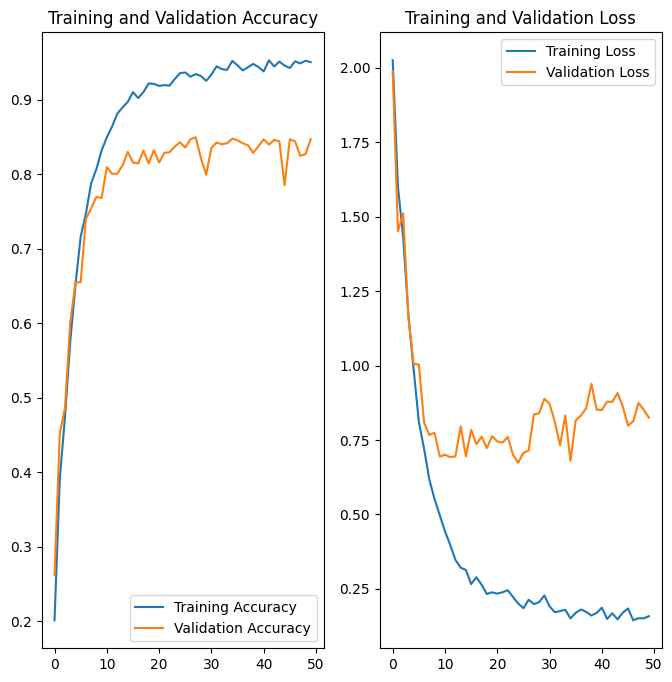

In [134]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1. The overfitting is now reduced  with the class rebalance
2. The accuracy of the model has also increased heavily
